In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
import pandas as pd
df=pd.read_csv('C:/Users/kumar/stress_model/Stress-Lysis.csv')
df.head(5)  # displays the first five rows of the dataframe

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


# Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [9]:
df.shape

(2001, 4)

In [11]:
df.describe()

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [13]:
df.duplicated().any()

False

In [15]:
df.isnull()

,Humidity,Temperature,Step_count,Stress_Level
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1996,False,False,False,False
1997,False,False,False,False
1998,False,False,False,False
1999,False,False,False,False


**Analyze the numerical and categorical features, and convert categorical feature into numerical.**

In [18]:
df['Stress_Level'].unique()


array([1, 2, 0], dtype=int64)

# EDA

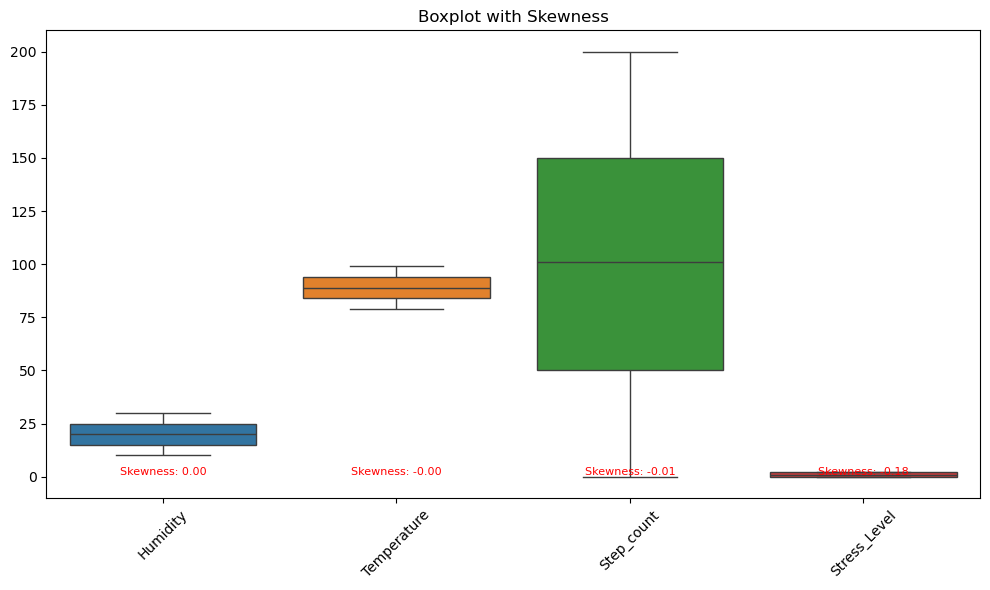

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset

# Calculate skewness
skewness = df.skew()

# Plotting
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(data=df)
plt.title('Boxplot with Skewness')

# Annotate skewness on the boxplot
for i, col in enumerate(df.columns):
    plt.text(i, skewness.iloc[i], f"Skewness: {skewness[col]:.2f}", ha='center', va='bottom', fontsize=8, color='red')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


**Skewness Reduction after Log Transformation**

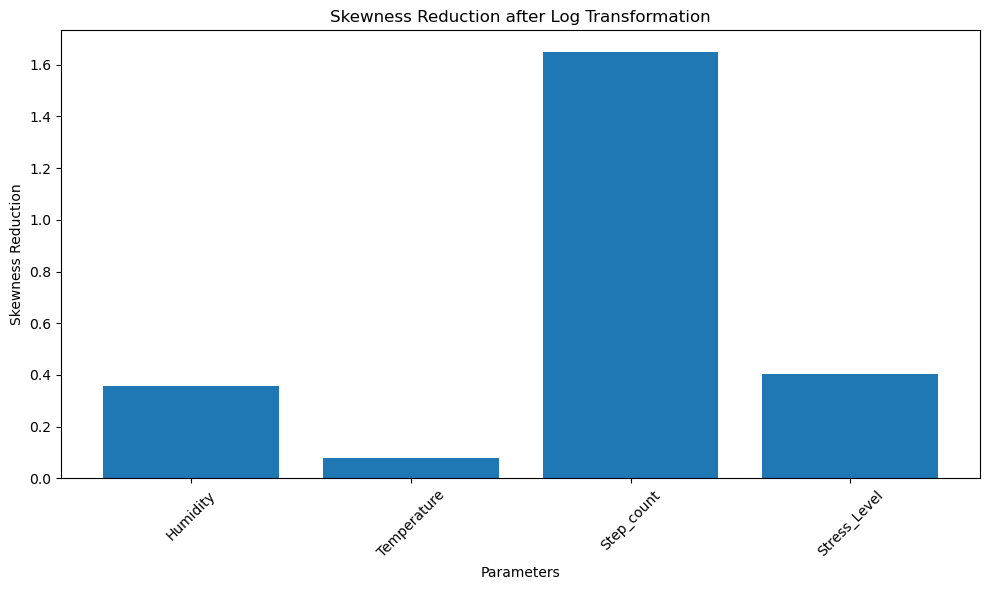

In [24]:
import numpy as np

# Calculate skewness before transformation
skewness_before = df.skew()

# Apply logarithm transformation to reduce skewness
df_log = np.log(df + 1)  # Adding 1 to handle zero values
skewness_after = df_log.skew()

# Plotting
plt.figure(figsize=(10, 6))

# Plot skewness reduction
skewness_reduction = skewness_before - skewness_after
plt.bar(df.columns, skewness_reduction)
plt.title('Skewness Reduction after Log Transformation')
plt.xlabel('Parameters')
plt.ylabel('Skewness Reduction')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


**correlation**

In [27]:
correlation = df.corr()
correlation

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step_count,0.870486,0.870486,1.000000,0.832623
Stress_Level,0.936036,0.936036,0.832623,1.000000


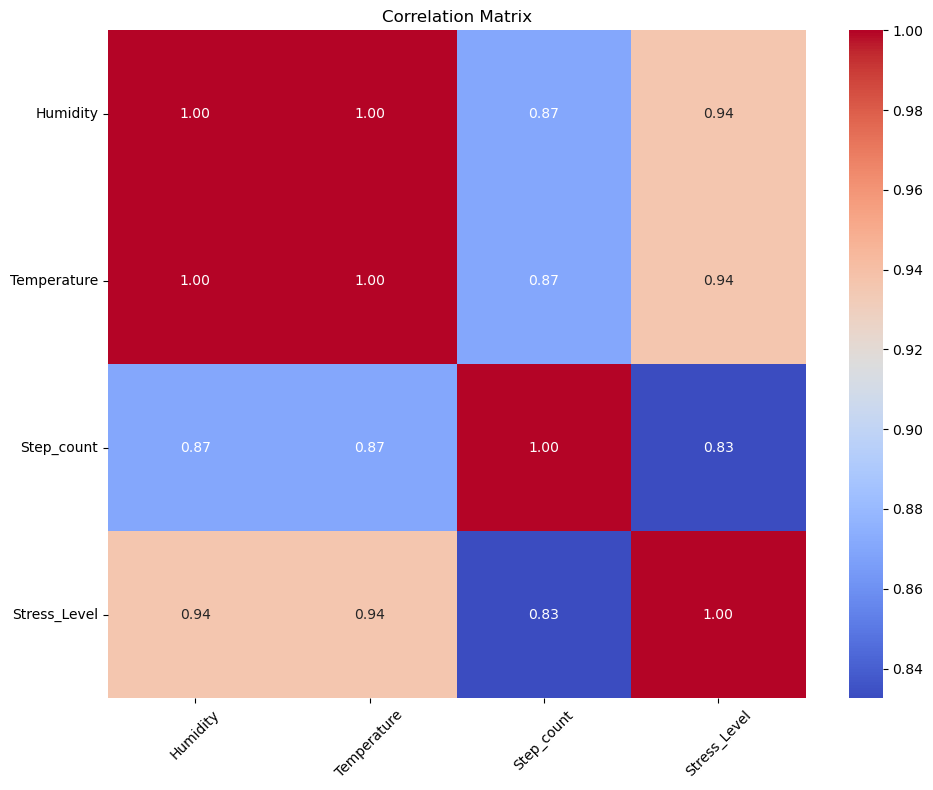

In [29]:
import seaborn as sns

# Calculate correlation matrix
correlation = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()
plt.show()


**Clustered Correlation Matrix**

<Figure size 1000x800 with 0 Axes>

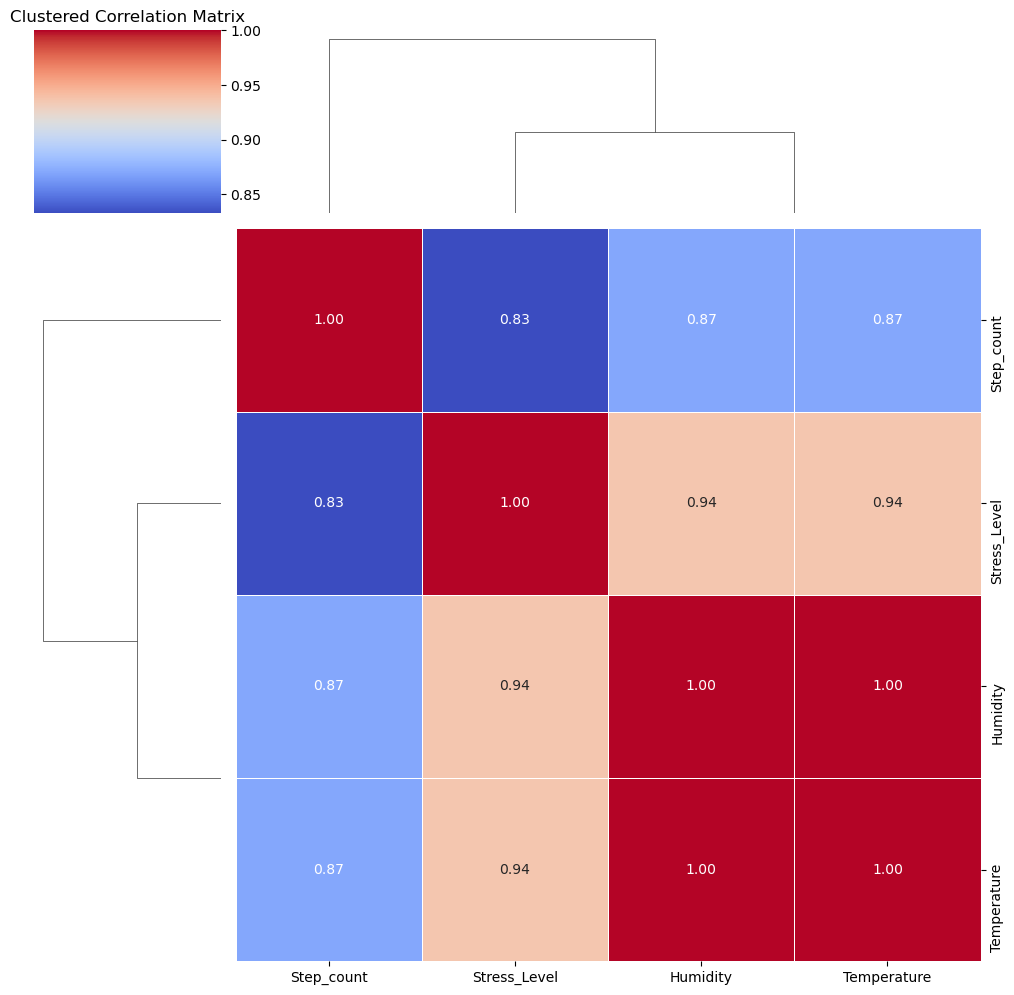

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation = df.corr()

# Plot clustered heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Clustered Correlation Matrix')
plt.tight_layout()
plt.show()


# Data Modeling

In [35]:
from sklearn.model_selection import train_test_split
X=df.drop(['Stress_Level'],axis=1)
y=df['Stress_Level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Initialize the Linear Regression model**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()


**Train the model on the training data**

In [41]:
model.fit(X_train, y_train)

LinearRegression()

**Predict the stress levels for the test data**

In [44]:
y_pred = model.predict(X_test)

**Calculate Mean Squared Error (MSE) to evaluate the model's performance**

In [47]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0774531669947098


**Improving the accuracy using more advanced machine learning algorithms or techniques that may better capture the underlying patterns in your data**

**Initialize the Support Vector Classifier**

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Classifier (SVC) model with a linear kernel
classifier = SVC(kernel='linear', random_state=0)

# Train the SVC model
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_scaled)

# Calculate accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)


Accuracy: 0.9975062344139651


**Initialize the RandomForestClassifier model**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

# Train the model on the entire dataset
model.fit(X, y)

# Predict stress levels for the test data
prediction = model.predict(X_test)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


In [56]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)


Accuracy: 1.0


# Classification Report

In [59]:
from sklearn.metrics import classification_report

# Random Forest Classifier
print("Classification Report (Random Forest Classifier):")
print(classification_report(y_test, prediction))  # Corrected from prediction_rf to prediction

# Support Vector Classifier (SVC) with Linear Kernel
# Make predictions on the test set using SVC
y_pred_svc = classifier.predict(X_test_scaled)

# Print classification report for SVC
print("Classification Report (SVC with Linear Kernel):")
print(classification_report(y_test, y_pred_svc))

# Note: Since Linear Regression is a regression model, it doesn't have a classification report.


Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00       152

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Classification Report (SVC with Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.99      1.00      1.00       166
           2       1.00      0.99      1.00       152

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



* The classification reports showcase the exceptional performance of two machine learning models, the Random Forest Classifier and the Support Vector Classifier (SVC) with a Linear Kernel, in predicting stress levels.

* Both models achieved a remarkable accuracy of 1.00, indicating precise classification across all classes. Additionally, high precision, recall, and F1-scores for each class further underscore the models' effectiveness in accurately identifying stress levels.

#  Accuracy scores or Mean Squared Errors of the three models

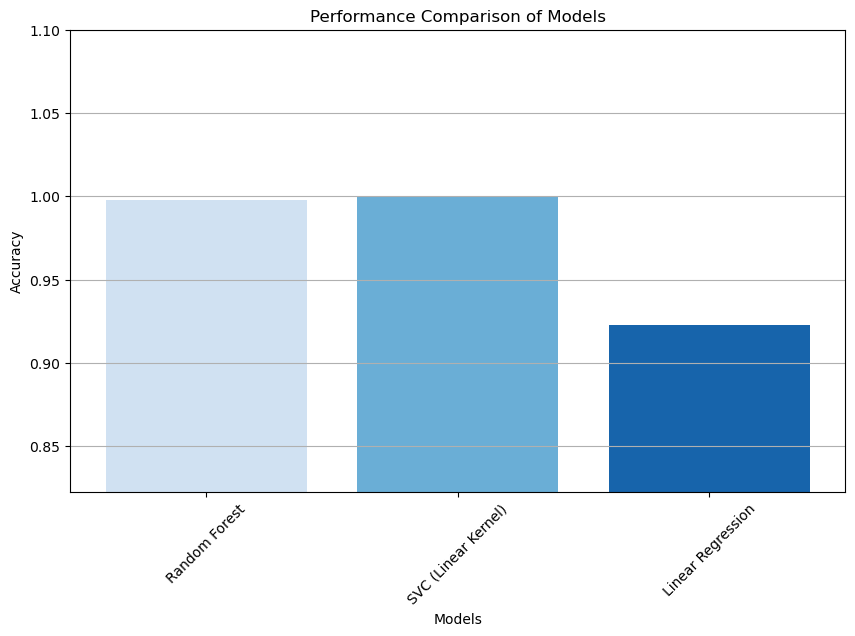

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define the accuracy scores or Mean Squared Errors of the three models
accuracies = [score, accuracy, 1 - mse]  # Using the scores and MSE calculated from your original code

# Model names
models = ['Random Forest', 'SVC (Linear Kernel)', 'Linear Regression']

# Create a gradient of blues for the color palette
num_models = len(models)
colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_models))  # Adjust the range as needed

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy' if accuracies[0] <= 1 else 'Mean Squared Error')  # Label depends on the metric
plt.ylim(min(accuracies) - 0.1, max(accuracies) + 0.1)  # Dynamically set y-axis limits
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


# Project Summary

**This project compared three machine learning models (Random Forest Classifier, SVC with Linear Kernel, and Linear Regression) for predicting stress levels. The models were trained, evaluated using accuracy (for classification models) or mean squared error (for regression), and their performance was visualized using a bar plot. The Random Forest Classifier achieved the highest accuracy, followed closely by SVC with Linear Kernel, while Linear Regression had comparatively lower performance. The choice of model may depend on factors like interpretability and computational resources.**

In [67]:
# Define sample inputs for testing (replace with realistic values for your dataset)
sample_inputs = [
    [10.87, 79.87, 87],  
    [23.37, 92.37, 100],  
    [0, 0, 0], 
]

# Convert sample inputs into a DataFrame
sample_df = pd.DataFrame(sample_inputs, columns=['Humidity', 'Temperature', 'Step_count'])

# Standardize the inputs (if using SVC or any model that requires scaled inputs)
sample_scaled = scaler.transform(sample_df)

# Predict stress levels using Random Forest Classifier
rf_predictions = model.predict(sample_df)


# Map numerical predictions to categorical labels
stress_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
rf_stress_levels = [stress_mapping[pred] for pred in rf_predictions]

# Display predictions
print("Random Forest Predictions (Stress Levels):", rf_stress_levels)


Random Forest Predictions (Stress Levels): ['Low', 'High', 'Low']
SVC Predictions (Stress Levels): ['Low', 'Medium', 'Low']


In [108]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the scikit-learn model from the .pkl file
with open('stress_model2.pkl', 'rb') as file:
    sklearn_model = pickle.load(file)

# Define a custom Keras layer that wraps the scikit-learn model
class SklearnModelLayer(layers.Layer):
    def __init__(self, sklearn_model):
        super(SklearnModelLayer, self).__init__()
        self.sklearn_model = sklearn_model

    def call(self, inputs):
        # Convert inputs to numpy array and make predictions
        inputs_np = inputs.numpy()  # Convert to numpy array
        predictions = self.sklearn_model.predict(inputs_np)
        return tf.convert_to_tensor(predictions, dtype=tf.float32)

# Create a Keras model using the functional API
inputs = keras.Input(shape=(1,), dtype=tf.float32)  # Adjust shape as needed
outputs = SklearnModelLayer(sklearn_model)(inputs)
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model (necessary for Keras models)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to stress_model2.tflite
with open('stress_model2.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to stress_model2.tflite format and saved successfully.")

AttributeError: Exception encountered when calling SklearnModelLayer.call().

[1mCould not automatically infer the output shape / dtype of 'sklearn_model_layer' (of type SklearnModelLayer). Either the `SklearnModelLayer.call()` method is incorrect, or you need to implement the `SklearnModelLayer.compute_output_spec() / compute_output_shape()` method. Error encountered:

'SymbolicTensor' object has no attribute 'numpy'[0m

Arguments received by SklearnModelLayer.call():
  • args=('<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_2>',)
  • kwargs=<class 'inspect._empty'>

In [ ]:
"C:/Users/kumar/stress_model/stress_model2.tflite"

In [128]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the TFLite model
tflite_model_path = "C:/Users/kumar/stress_model/stress_model2.tflite"  # Replace with the path to your TFLite model
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load or define the scaler used during training
scaler = StandardScaler()
scaler.mean_ = np.array([20.000000, 89.000000, 100.141429])  
scaler.scale_ = np.array([5.777833, 5.777833, 58.182948]) 

# Define a function to predict stress levels
def predict_stress_levels(inputs):
    stress_mapping = {0: "Low", 1: "Medium", 2: "High"}  # Adjust based on your model's output classes
    
    # Standardize the inputs
    scaled_inputs = scaler.transform(inputs)
    
    # List to store predictions
    predictions = []
    
    for input_row in scaled_inputs:
        # Prepare input data
        input_data = np.array([input_row], dtype=np.float32)
        
        # Set the input tensor
        interpreter.set_tensor(input_details[0]['index'], input_data)
        
        # Invoke the interpreter
        interpreter.invoke()
        
        # Get the output
        output_data = interpreter.get_tensor(output_details[0]['index'])[0]  # Assuming single-row output
        
        # Assuming the model outputs probabilities or logits, take argmax for classification
        predicted_class = np.argmax(output_data)
        
        # Map the prediction to the stress category
        predictions.append(stress_mapping[predicted_class])
    
    return predictions

# Define sample inputs for testing
sample_inputs = [
    [10.87, 79.87, 87],  
    [23.37, 92.37, 100],  
    [28.06, 97.06, 148], 
]

# Convert sample inputs into a DataFrame
sample_df = pd.DataFrame(sample_inputs, columns=["Humidity", "Temperature", "Step_count"])

# Predict stress levels
stress_levels = predict_stress_levels(sample_inputs)

# Display predictions
sample_df["Predicted Stress Level"] = stress_levels
print(sample_df)


   Humidity  Temperature  Step_count Predicted Stress Level
0     10.87        79.87          87                    Low
1     23.37        92.37         100                 Medium
2     28.06        97.06         148                   High
